In [1]:
#|default_exp app

Dogs v Cats

In [2]:
#|export
from fastai.vision.all import *
import gradio as gr

def is_cat(x): return x[0].isupper()

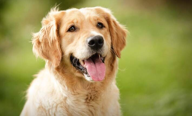

In [3]:
im = PILImage.create('dog.jpg')
im.thumbnail((192,192))
im

In [4]:
#|export
learn = load_learner('model.pkl')

In [5]:
%time learn.predict(im)

CPU times: user 267 ms, sys: 18.3 ms, total: 285 ms
Wall time: 420 ms


('False', tensor(0), tensor([1.0000e+00, 2.7909e-06]))

In [6]:
#|export
categories = ('Dog', 'Cat')

def classify_image(img):
  pred,idx,probs = learn.predict(img)
  return dict(zip(categories, map(float,probs)))

In [7]:
classify_image(im)

{'Dog': 0.9999972581863403, 'Cat': 2.7908604351978283e-06}

In [8]:
#|export
image = gr.components.Image(height=192, width=192)
label = gr.components.Label()
examples = ['dog.jpg', 'cat.jpg', 'dunno.jpg']

intf = gr.Interface(fn=classify_image, inputs=image, outputs=label, examples=examples)
intf.launch(inline=False)

Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


In [9]:
from nbdev.export import nb_export

In [10]:
nb_export('app.ipynb', 'app')